# I.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [65]:
def stationary_distribution(omega, theta, eps):
    while np.linalg.norm(omega.dot(theta) - omega) > eps:
        omega = omega.dot(theta)
    return omega

In [66]:
def get_properties(L, N, mu, theta):
    omega = np.array([0.3, 0.6, 0, 0, 0, 0, 0])
    eps = 0.001
    omega = stationary_distribution(omega, theta, eps)
    
    # м.о. числа требований в системах
    s = np.zeros((N+1, L))
    # м.о. длительности пребывания требований в системах
    u = np.zeros((N+1, L))
    # м.о. длительности ожидания требований в очереди системы
    w = np.zeros(L)
    # м.о. числа требований, ожидающих обслуживание в очереди системы
    b = np.zeros(L)
    # м.о. числа занятых приборов в системах
    h = np.zeros(L)
    # интенсивность входящего потока требований в системы
    lmbds = np.zeros(L)
    # коэффициенты использования систем
    psi = np.zeros(L)
    
    for Y in range(1, N + 1):
        for i in range(L):
            u[Y][i] = 1 / mu[i] * (s[Y-1][i] + 1)
        for i in range(L):
            summa = 0
            for j in range(L):
                summa += omega[j] * u[Y][j]
            s[Y][i] = omega[i] * u[Y][i] * Y / summa

    for i in range(L):
        w[i] = u[N][i] - (1 / mu[i])
        b[i] = s[N][i] * w[i] / u[N][i]
        h[i] = s[N][i] - b[i]
        lmbds[i] = h[i] * mu[i]
        psi[i] = lmbds[i] / mu[i]
            
    return s[N], u[N], lmbds, psi

In [67]:
def check(m):
    delta = 0.01
    for i in range(1, len(m)):
        if abs(m[0] - m[i]) > delta:
            return True
    return False

In [68]:
L = 7
N = 14 # число требований в сети
mu = np.array([14, 8, 13, 4, 5, 12, 3])
theta = np.array([[0, 0.3, 0, 0.1, 0, 0.3, 0.3],
                  [0, 0, 0.5, 0, 0, 0.2, 0.3],
                  [0.4, 0.3, 0, 0, 0.2, 0, 0.1],
                  [0.4, 0, 0, 0.1, 0, 0.2, 0.3],
                  [0, 0, 0.1, 0.1, 0, 0.5, 0.3],
                  [0, 0, 0, 0.9, 0.1, 0, 0],
                  [0, 0, 0, 0.6, 0.2, 0.1, 0.1]])

In [69]:
# нахождение вектора omega
omega = np.array([0.3, 0.4, 0, 0, 0, 0.3, 0])
eps = 0.0001
omega = stationary_distribution(omega, theta, eps)
print(f'Omegas: {omega},\nCheck (~1): {sum(omega)}')

Omegas: [0.14528435 0.0535288  0.03319389 0.32997213 0.06414535 0.17251681
 0.20135867],
Check (~1): 1.0000000000000002


In [70]:
# интенсивность обслуживания во 2-й системе
mu_to_plot = np.linspace(1, 50, 20)
s_list = []
u_list = []
lmbd_list = []
for mu_2 in mu_to_plot:
    mu[1] = mu_2
    properties = get_properties(L, N, mu, theta)
    s_list.append(properties[0])
    u_list.append(properties[1])
    lmbd_list.append(properties[2])
s_list = np.array(s_list)
s_list = np.transpose(s_list)
u_list = np.array(u_list)
u_list = np.transpose(u_list)
lmbd_list = np.array(lmbd_list)
lmbd_list = np.transpose(lmbd_list)

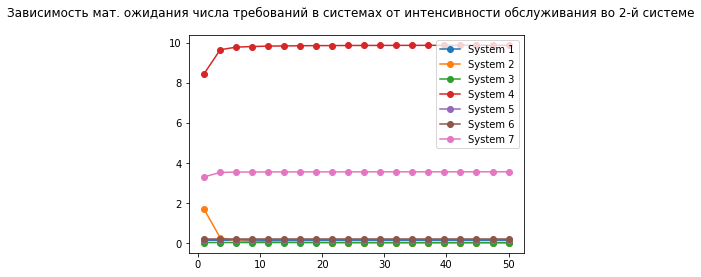

In [71]:
for i, s in enumerate(s_list):
    plt.plot(mu_to_plot, s, 'o-', label=f'System {str(i + 1)}')
plt.suptitle(f'Зависимость мат. ожидания числа требований в системах от интенсивности обслуживания во 2-й системе')
plt.legend()
plt.show()

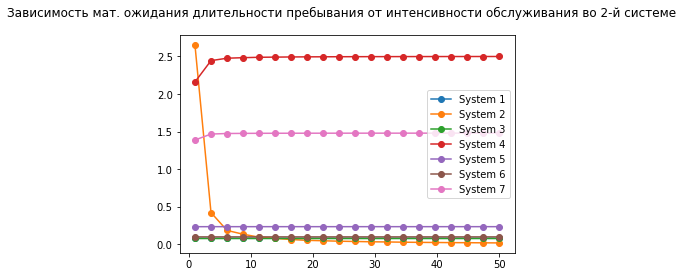

In [72]:
for i, u in enumerate(u_list):
    plt.plot(mu_to_plot, u, 'o-', label=f'System {str(i + 1)}')
plt.suptitle(f'Зависимость мат. ожидания длительности пребывания от интенсивности обслуживания во 2-й системе')
plt.legend()
plt.show()

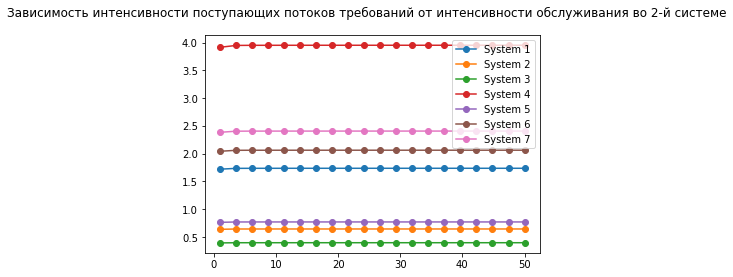

In [73]:
for i, lmbds in enumerate(lmbd_list):
    plt.plot(mu_to_plot, lmbds, 'o-', label=f'System {str(i + 1)}')
plt.suptitle(f'Зависимость интенсивности поступающих потоков требований от интенсивности обслуживания во 2-й системе')
plt.legend()
plt.show()

In [74]:
# интенсивность обслуживания в 4-й системе
num = 4
mu_to_plot = np.linspace(1, 50, 20)
s_list = []
u_list = []
lmbd_list = []
for mu_4 in mu_to_plot:
    mu[num - 1] = mu_4
    properties = get_properties(L, N, mu, theta)
    s_list.append(properties[0])
    u_list.append(properties[1])
    lmbd_list.append(properties[2])
s_list = np.array(s_list)
s_list = np.transpose(s_list)
u_list = np.array(u_list)
u_list = np.transpose(u_list)
lmbd_list = np.array(lmbd_list)
lmbd_list = np.transpose(lmbd_list)

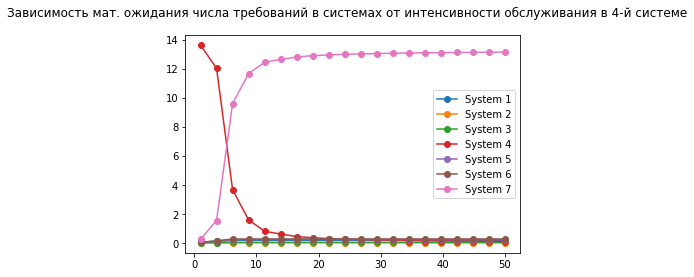

In [75]:
for i, s in enumerate(s_list):
    plt.plot(mu_to_plot, s, 'o-', label=f'System {str(i + 1)}')
plt.suptitle(f'Зависимость мат. ожидания числа требований в системах от интенсивности обслуживания в 4-й системе')
plt.legend()
plt.show()

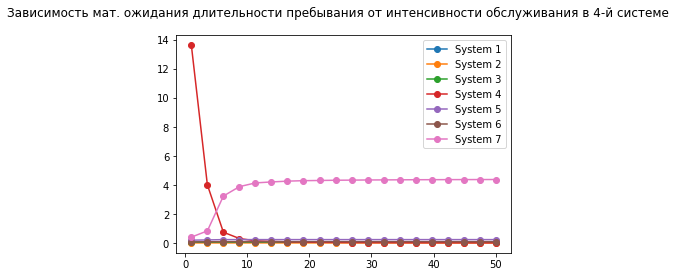

In [76]:
for i, u in enumerate(u_list):
    plt.plot(mu_to_plot, u, 'o-', label=f'System {str(i + 1)}')
plt.suptitle(f'Зависимость мат. ожидания длительности пребывания от интенсивности обслуживания в 4-й системе')
plt.legend()
plt.show()

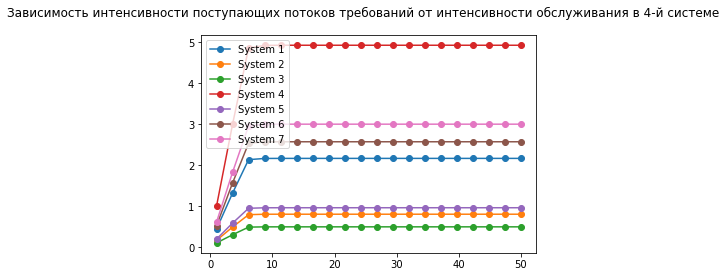

In [77]:
for i, lmbds in enumerate(lmbd_list):
    plt.plot(mu_to_plot, lmbds, 'o-', label=f'System {str(i + 1)}')
plt.suptitle(f'Зависимость интенсивности поступающих потоков требований от интенсивности обслуживания в 4-й системе')
plt.legend()
plt.show()

# II.

## A)

In [78]:
L = 7
N = 14 # число требований в сети
mu = np.array([1]*L)
theta = np.array([[0, 0, 0.4, 0, 0.6, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0],
                  [0, 0.1, 0, 0, 0, 0.9, 0],
                  [0, 0, 0, 0, 0, 0, 1],
                  [0, 0.4, 0, 0.6, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0]])

In [79]:
omega = np.array([0, 0, 0.5, 0, 0, 0.5, 0])
eps = 0.0001
omega = stationary_distribution(omega, theta, eps)
print(f'Omegas: {omega},\nCheck (~1): {sum(omega)}')

Omegas: [0.24994399 0.07002214 0.09999339 0.09002847 0.14999008 0.24999992
 0.09002202],
Check (~1): 1.0000000000000002


In [80]:
s = get_properties(L, N, mu, theta)[0]
mu_temp = np.array([1.]*L)
cnt = 0

while check(s):
    s = get_properties(L, N, mu_temp, theta)[0]
    
    s_max = max(s)
    s_min = min(s)
    i, = np.where(s == s_min)
    j, = np.where(s == s_max)

    cnt += 1
    if cnt % 50 == 0:
        i = random.randint(0, len(s) - 1)
        j = random.randint(0, len(s) - 1)
        if s[i] > s[j]:
            i, j = j, i
        s_min = s[i]
        s_max = s[j]

    print(f'Перенос интенсивности обслуживания из {i+1} в {j+1}')
    print(f'{s[i]} -> {s[j]}')

    delta = min(mu_temp[i], mu_temp[j])
    gamma = random.random() * delta * (s_max - s_min) / s_max
    mu_temp[i] -= gamma
    mu_temp[j] += gamma
print(f"\nВектор mu: {mu_temp}\nМ.о. числа требований в системах: {s}")

Перенос интенсивности обслуживания из [2] в [6]
[0.33999756] -> [5.48828241]
Перенос интенсивности обслуживания из [4] в [1]
[0.53690848] -> [7.71664507]
Перенос интенсивности обслуживания из [7] в [4]
[0.64274811] -> [4.34036033]
Перенос интенсивности обслуживания из [3] в [6]
[0.87432366] -> [4.70411143]
Перенос интенсивности обслуживания из [2] в [3]
[0.91882071] -> [3.78016421]
Перенос интенсивности обслуживания из [2] в [3]
[1.00644452] -> [3.39342371]
Перенос интенсивности обслуживания из [4] в [1]
[1.42825514] -> [2.9392444]
Перенос интенсивности обслуживания из [7] в [4]
[1.46644116] -> [2.37020621]
Перенос интенсивности обслуживания из [4] в [7]
[1.35856138] -> [2.60301788]
Перенос интенсивности обслуживания из [4] в [7]
[1.40873561] -> [2.48788193]
Перенос интенсивности обслуживания из [7] в [4]
[1.17503207] -> [3.15087142]
Перенос интенсивности обслуживания из [4] в [7]
[0.97546968] -> [4.0594252]
Перенос интенсивности обслуживания из [4] в [7]
[1.18905568] -> [3.09874276]
П

Перенос интенсивности обслуживания из [7] в [2]
[1.63268727] -> [2.62263829]
Перенос интенсивности обслуживания из [2] в [7]
[1.18020324] -> [3.39540257]
Перенос интенсивности обслуживания из [7] в [2]
[1.45698225] -> [3.06965004]
Перенос интенсивности обслуживания из [7] в [2]
[1.6282844] -> [2.63225236]
Перенос интенсивности обслуживания из [2] в [7]
[1.35455792] -> [2.91997387]
Перенос интенсивности обслуживания из [7] в [2]
[1.7755042] -> [2.34654831]
Перенос интенсивности обслуживания из [2] в [7]
[1.86560055] -> [2.14245352]
Перенос интенсивности обслуживания из [7] в [2]
[1.95845037] -> [2.07425915]
Перенос интенсивности обслуживания из [2] в [7]
[1.81730628] -> [2.19255505]
Перенос интенсивности обслуживания из [7] в [2]
[1.63475378] -> [2.61815084]
Перенос интенсивности обслуживания из [5] в [2]
[1.99242785] -> [2.02555563]
Перенос интенсивности обслуживания из [6] в [5]
[1.99495624] -> [2.00962241]
Перенос интенсивности обслуживания из [1] в [5]
[1.9959703] -> [2.00560885]

В

## Б)

In [81]:
L = 7
N = 14 # число требований в сети
mu = np.array([1]*L)
theta = np.array([
    [.0, .6, .0, .4, .0, .0, .0],
    [.0, .0, .5, .0, .5, .0, .0],
    [.0, .0, .0, .3, .0, .7, .0],
    [.0, .0, .0, .0, .8, .0, .2],
    [.5, .0, .0, .0, .0, .5, .0],
    [.0, .3, .0, .0, .0, .0, .7],
    [.6, .0, .4, .0, .0, .0, .0]
])

In [82]:
def get_theta_for_psi(L, N, mu, theta):
    prob_arr = np.arange(0.1, 1., 0.1)
    for v1 in np.arange(.1, 1., .1):
        for v2 in np.arange(.1, 1., .1):
            for v3 in np.arange(.1, 1., .1):
                for v4 in np.arange(.1, 1., .1):
                    for v5 in np.arange(.1, 1., .1):
                        for v6 in np.arange(.1, 1., .1):
                            for v7 in np.arange(.1, 1., .1):
                                theta[0][1], theta[0][3] = v1, 1 - v1
                                theta[1][2], theta[1][4] = v2, 1 - v2
                                theta[2][3], theta[2][5] = v3, 1 - v3
                                theta[3][4], theta[3][6] = v4, 1 - v4
                                theta[4][0], theta[4][5] = v5, 1 - v5
                                theta[5][1], theta[5][6] = v6, 1 - v6
                                theta[6][0], theta[6][2] = v7, 1 - v7
                    *_, psi = get_properties(L, N, mu, theta)
                    print(f'psi = {psi}')
                    if not check(psi):
                        return theta

In [83]:
# def move_up(cur, visited, end, theta, L):
#     for l in range(L):
#         if theta[l][cur] > 0 and not l in visited:
#             visited.append(l)
#             if np.count_nonzero(theta[l]) > 1:
#                 for i in range(len(theta[l])):
#                     if theta[l][i] > 0 and i != cur:
#                         return l, i
#             else:
#                 return move_up(l, visited, end, theta, L)
#         else:
#             pass
#         # elif l == end:
#         #
#         #     return move_down(visited[-1], visited, end, theta, L)
#         # else:
#         #     pass

# #
# # def move_down(cur, visited, end, theta, L):
# #     for l in range(L):
# #         if theta[cur][l] > 0 and not l in visited:
# #             cur = l
# #             visited.append(cur)
# #             if cur == end:
# #                 return visited
# #             return move_down(cur, visited, end, theta, L)
# #         else:
# #             pass

In [84]:
print(get_properties(L, N, mu, theta)[3])
theta_ans = get_theta_for_psi(L, N, mu, theta)
print(theta_ans)

[0.76606198 0.69806038 0.61205715 0.48995042 0.73975323 0.80079325
 0.65579413]
psi = [0.93443243 0.19520916 0.0972786  0.84789995 0.26096551 0.11339671
 0.77574745]
psi = [0.94357015 0.19885436 0.08963878 0.86060215 0.35011036 0.11594595
 0.69775426]
psi = [0.94999698 0.20074327 0.08171213 0.86238386 0.44064551 0.11738775
 0.61759767]
psi = [0.95238868 0.2017813  0.07329293 0.86245767 0.52836288 0.1185658
 0.53129326]
psi = [0.95156702 0.20221851 0.06461724 0.8601399  0.61381651 0.11939782
 0.44328886]
psi = [0.94552843 0.20259815 0.05565821 0.85827742 0.69494026 0.11979565
 0.35406287]
psi = [0.9350319  0.20148152 0.04667928 0.8489224  0.77370389 0.11939747
 0.26601696]
psi = [0.91905884 0.19769348 0.03761973 0.82835625 0.84280526 0.1181305
 0.17789376]
psi = [0.88996112 0.19338388 0.02850225 0.80634982 0.89845328 0.11533871
 0.09208602]
psi = [0.9305357  0.18483921 0.0966645  0.85419671 0.25205924 0.1023762
 0.77938806]
psi = [0.94107667 0.18924828 0.08920055 0.86411011 0.344009   0

 0.78921317]
psi = [0.93548228 0.19156496 0.10948017 0.8718351  0.32829687 0.10930713
 0.70985024]
psi = [0.94046559 0.19625491 0.10166319 0.87921291 0.41950136 0.11331132
 0.62473083]
psi = [0.94450712 0.1994307  0.09384181 0.87727268 0.51205834 0.11666258
 0.53988166]
psi = [0.94497656 0.20188974 0.0855048  0.87370793 0.6003751  0.11971744
 0.45035055]
psi = [0.94016483 0.20422948 0.07671073 0.87045803 0.68326813 0.1222771
 0.35914568]
psi = [0.93063841 0.20522225 0.06790946 0.86061832 0.76445707 0.12402566
 0.26988359]
psi = [0.91555661 0.20342046 0.05888301 0.83948089 0.83675528 0.12481623
 0.18084459]
psi = [0.89035811 0.20025355 0.04946932 0.81386939 0.89295613 0.12421101
 0.09379555]
psi = [0.91762501 0.17323066 0.11406467 0.86867909 0.22583753 0.09087892
 0.79213418]
psi = [0.92921142 0.1799535  0.10719264 0.88172225 0.31941634 0.09642947
 0.71283474]
psi = [0.93810477 0.18482085 0.09996869 0.88296486 0.41405631 0.10119097
 0.63042177]
psi = [0.94216649 0.18895551 0.09204464 0.

 0.80151093]
psi = [0.92025392 0.17536517 0.12465482 0.89197103 0.30025396 0.09252435
 0.72038294]
psi = [0.92811582 0.18191329 0.1180114  0.89678537 0.39517984 0.09866792
 0.63562721]
psi = [0.93365597 0.18725699 0.11112225 0.89477727 0.49058079 0.10440484
 0.5491698 ]
psi = [0.93520942 0.19200111 0.10355601 0.89115539 0.58196683 0.10981607
 0.45811091]
psi = [0.93175657 0.19648188 0.09537132 0.88701314 0.66756819 0.1147107
 0.36509049]
psi = [0.9237747  0.19972823 0.08715867 0.87696195 0.75116074 0.11885893
 0.27410837]
psi = [0.90837907 0.20109362 0.07852793 0.85938131 0.82627802 0.12185654
 0.18368718]
psi = [0.88324038 0.1999251  0.06943117 0.83221836 0.88799771 0.12327288
 0.09550421]
psi = [0.89954635 0.15325635 0.12624564 0.88729848 0.19546779 0.0701721
 0.8030145 ]
psi = [0.91578181 0.16147206 0.12106141 0.89644279 0.29311487 0.07759637
 0.72717391]
psi = [0.92554541 0.16859101 0.11469626 0.90017634 0.38937804 0.08465369
 0.64085756]
psi = [0.93072443 0.17492431 0.10768628 0.8

psi = [0.91849088 0.16710291 0.1221921  0.91463768 0.46461302 0.08321857
 0.55533511]
psi = [0.92166117 0.17384906 0.11618031 0.91042939 0.561261   0.09074829
 0.46573533]
psi = [0.91902799 0.18044775 0.10912027 0.90641772 0.65071773 0.0977561
 0.37161008]
psi = [0.91492938 0.18512277 0.10220265 0.89329472 0.73889745 0.10436606
 0.27932183]
psi = [0.90182529 0.18857762 0.09434312 0.87558766 0.81620317 0.10981255
 0.18662416]
psi = [0.87681946 0.19032831 0.08574925 0.85119277 0.88038376 0.11346265
 0.09651188]
psi = [0.88206164 0.12714256 0.13210737 0.90129236 0.16591657 0.0430855
 0.81289486]
psi = [0.89890083 0.13704939 0.1281023  0.91375278 0.2641905  0.05210698
 0.73400507]
psi = [0.90878331 0.14603297 0.12298796 0.91900459 0.36225937 0.06087129
 0.64752812]
psi = [0.91595047 0.15404642 0.11759787 0.91769415 0.46096436 0.06945455
 0.55933601]
psi = [0.91864452 0.1616784  0.11146298 0.91470977 0.55627814 0.07774743
 0.46671045]
psi = [0.91801679 0.16865291 0.10496115 0.90849624 0.648

 0.73919519]
psi = [0.89872316 0.13280695 0.13158865 0.92799909 0.34369445 0.04764492
 0.65226854]
psi = [0.906361   0.14150849 0.12734426 0.92739521 0.44279301 0.05703217
 0.5634498 ]
psi = [0.90914988 0.14995396 0.1222589  0.92532357 0.53889096 0.06615365
 0.47030455]
psi = [0.90699711 0.15821272 0.11642635 0.92218495 0.63033082 0.07484949
 0.37515832]
psi = [0.90420117 0.16483694 0.11086234 0.91073581 0.72135104 0.08331047
 0.2820448 ]
psi = [0.89270855 0.17038968 0.10423387 0.8946062  0.80222224 0.09076442
 0.18825683]
psi = [0.87165902 0.17375765 0.09673337 0.86907771 0.87030749 0.09685029
 0.09668162]
psi = [0.91148066 0.34175282 0.28367665 0.85170899 0.22131    0.27791558
 0.79238096]
psi = [0.92701836 0.34760564 0.28096128 0.86005265 0.31210517 0.28340978
 0.71911893]
psi = [0.93384988 0.35206727 0.27442893 0.86856641 0.40008878 0.28775088
 0.63436067]
psi = [0.93637827 0.35526717 0.26757086 0.8716505  0.48893111 0.29035393
 0.5499345 ]
psi = [0.93694197 0.35654089 0.26087119 0

 0.11345666]
psi = [0.88569177 0.27791302 0.27537274 0.88180533 0.17104161 0.21035413
 0.81172762]
psi = [0.90129188 0.28749369 0.27433213 0.8962202  0.26461549 0.21895173
 0.73634803]
psi = [0.91163589 0.29474908 0.27215814 0.90151708 0.3600694  0.22590623
 0.65603113]
psi = [0.91670017 0.30043148 0.26753842 0.90384381 0.45329106 0.23200036
 0.56756778]
psi = [0.91822774 0.30498778 0.26182649 0.90281874 0.54483944 0.23725457
 0.47674669]
psi = [0.91636827 0.30844185 0.25514026 0.8986389  0.63377507 0.24164733
 0.38473151]
psi = [0.91009512 0.31041647 0.24727603 0.8903396  0.71831858 0.24484205
 0.29221914]
psi = [0.89741322 0.31017721 0.23780266 0.87600949 0.79546057 0.24621328
 0.20006414]
psi = [0.8733336  0.30755642 0.22674809 0.854552   0.86343528 0.24414926
 0.11012242]
psi = [0.88022273 0.23530731 0.24639852 0.89048237 0.15932612 0.16404871
 0.81551016]
psi = [0.89630259 0.24509922 0.24540575 0.90522487 0.25383497 0.17302119
 0.73899131]
psi = [0.90717441 0.25280357 0.24323587 0

 0.38920062]
psi = [0.89434256 0.29635391 0.26734416 0.91165882 0.69958805 0.22953206
 0.29734458]
psi = [0.88505955 0.29777856 0.25861138 0.89810131 0.7773169  0.23364516
 0.20271684]
psi = [0.86268046 0.29792069 0.24869144 0.87869771 0.84898821 0.23388294
 0.11121377]
psi = [0.86345304 0.21120954 0.25207035 0.90046356 0.13264536 0.1390588
 0.82657942]
psi = [0.88122835 0.22193916 0.25307767 0.91668282 0.22824864 0.14920298
 0.74989161]
psi = [0.88897645 0.23135963 0.25094525 0.92727995 0.32335397 0.1581709
 0.66263966]
psi = [0.89370574 0.23939685 0.24827774 0.93076206 0.41879925 0.16633767
 0.57325496]
psi = [0.89528706 0.24659613 0.24472548 0.93087173 0.51312688 0.17392259
 0.48140261]
psi = [0.8957304  0.25260266 0.24157651 0.92620509 0.60831514 0.18102878
 0.38987942]
psi = [0.89126531 0.25752852 0.23625084 0.91878531 0.69707864 0.18730246
 0.2953188 ]
psi = [0.88083209 0.26062619 0.22941422 0.90542885 0.77910754 0.19219094
 0.20088558]
psi = [0.86212263 0.26158828 0.21954392 0.8

 0.57511377]
psi = [0.87647613 0.16777076 0.19877996 0.94891635 0.4896054  0.08895877
 0.48178021]
psi = [0.87568427 0.17586879 0.19647081 0.94688467 0.58366894 0.09790827
 0.38723076]
psi = [0.87443871 0.18278149 0.19420974 0.93954587 0.67667194 0.10669247
 0.29278101]
psi = [0.86308026 0.18923511 0.19047056 0.92920014 0.76435787 0.11412562
 0.19777475]
psi = [0.84845639 0.19306146 0.18410114 0.90922572 0.83700188 0.12088482
 0.10290473]
psi = [0.84228818 0.10977214 0.18189095 0.92113393 0.10287484 0.02853214
 0.83009889]
psi = [0.85945662 0.12020585 0.18406128 0.936884   0.20000444 0.03835755
 0.75560352]
psi = [0.86936921 0.12992554 0.18415867 0.94569616 0.29749816 0.04813372
 0.66855311]
psi = [0.87453624 0.13903548 0.18324291 0.94925591 0.39463052 0.05777391
 0.57678401]
psi = [0.87472533 0.14794668 0.18086547 0.95092656 0.48861069 0.067141
 0.48058326]
psi = [0.87625326 0.15597007 0.17950867 0.94741855 0.58499498 0.07653459
 0.38720011]
psi = [0.87012683 0.16401479 0.17615981 0.9

psi = [0.96928886 0.34227211 0.10964664 0.78529612 0.66881996 0.16519886
 0.41065763]
psi = [0.96256465 0.34014746 0.10110307 0.77785777 0.74126318 0.16495324
 0.32866096]
psi = [0.94937378 0.3378145  0.09203331 0.77023394 0.80657856 0.16377116
 0.2466362 ]
psi = [0.92814698 0.33163752 0.08281218 0.75342781 0.86624055 0.16100542
 0.16652444]
psi = [0.90147633 0.32066878 0.07309753 0.72602161 0.91143839 0.15717645
 0.08838444]
psi = [0.96077524 0.3202973  0.13729361 0.7932252  0.33626797 0.14329172
 0.72965638]
psi = [0.96669266 0.32574025 0.13036501 0.80163028 0.419582   0.14651837
 0.6536808 ]
psi = [0.96963663 0.32879028 0.12308356 0.80318303 0.50260977 0.1488738
 0.57556031]
psi = [0.97083396 0.32924215 0.11555804 0.79796328 0.58461832 0.15063144
 0.49562697]
psi = [0.96835053 0.32962563 0.10745527 0.79342867 0.66241869 0.15210269
 0.41311844]
psi = [0.96076119 0.33042129 0.09892477 0.7901882  0.73584154 0.15297455
 0.33024206]
psi = [0.94773034 0.3280425  0.09025605 0.77891559 0.80

psi = [0.96304702 0.34150878 0.14516505 0.81221894 0.64745629 0.16605825
 0.42417548]
psi = [0.95733086 0.34170913 0.13681172 0.80421875 0.72405545 0.16807735
 0.33947965]
psi = [0.94591088 0.34018792 0.12778898 0.79237319 0.79408709 0.16906791
 0.25493146]
psi = [0.92512771 0.33756875 0.11814857 0.77797326 0.85615828 0.16834077
 0.17203135]
psi = [0.89653369 0.32969853 0.10793752 0.75194041 0.90654578 0.16588219
 0.09176148]
psi = [0.94555188 0.30670992 0.16713783 0.82533077 0.29633333 0.13015253
 0.75334148]
psi = [0.95491673 0.31374308 0.16147902 0.8312502  0.38475149 0.13552474
 0.67662816]
psi = [0.96083999 0.31800416 0.15527495 0.82934038 0.47308759 0.14016224
 0.59675937]
psi = [0.96259552 0.32181347 0.14807821 0.8270322  0.55800378 0.14443353
 0.51238074]
psi = [0.96113096 0.32462513 0.1404145  0.82227591 0.64017205 0.14822056
 0.42705214]
psi = [0.95449298 0.3276185  0.13210629 0.8181037  0.71763406 0.151309
 0.34122373]
psi = [0.94289106 0.32747749 0.12358263 0.80605274 0.791

 0.70686929]
psi = [0.94204272 0.27254147 0.17151393 0.8720065  0.42668161 0.09391626
 0.62199912]
psi = [0.94386025 0.28085991 0.16541873 0.87365262 0.51737204 0.10123195
 0.533845  ]
psi = [0.94595262 0.28594327 0.15929266 0.86592451 0.60653407 0.10831785
 0.44514918]
psi = [0.9404724  0.29218038 0.15233134 0.86123887 0.69210547 0.11461921
 0.35607054]
psi = [0.93336154 0.29408148 0.14465684 0.84531592 0.77022584 0.12043698
 0.26623749]
psi = [0.91657695 0.29466148 0.13598728 0.82597228 0.83925636 0.12483447
 0.17794233]
psi = [0.8879006  0.29262366 0.12649281 0.79983476 0.89692828 0.12720985
 0.09286755]
psi = [0.91372042 0.23508654 0.17264811 0.87181674 0.22788384 0.05730074
 0.78945233]
psi = [0.92999626 0.24498448 0.16937503 0.87735066 0.32360882 0.06612153
 0.71088747]
psi = [0.93821026 0.25412717 0.16452252 0.87979818 0.41783359 0.07459184
 0.62530145]
psi = [0.94220743 0.26214454 0.15892002 0.87831737 0.51026084 0.08274179
 0.53685938]
psi = [0.94287043 0.26919247 0.15279495 0

psi = [0.92604967 0.24532896 0.17694679 0.90266253 0.48252341 0.06594367
 0.54697263]
psi = [0.9274759  0.25354446 0.17195271 0.89938091 0.57504204 0.07468037
 0.45616225]
psi = [0.92538583 0.26072393 0.16636094 0.89277258 0.66435588 0.08303748
 0.36461508]
psi = [0.91940333 0.26546325 0.1605329  0.87896805 0.75051046 0.09085742
 0.2736294 ]
psi = [0.90374551 0.26943207 0.15251719 0.86277167 0.82333167 0.09748521
 0.18203128]
psi = [0.88210809 0.26857869 0.1435091  0.8338417  0.88345336 0.1030342
 0.09353823]
psi = [0.93350848 0.53302079 0.3932402  0.78849773 0.29097853 0.38388338
 0.74522849]
psi = [0.94289312 0.54033021 0.39045152 0.79623009 0.37414633 0.38926399
 0.67397587]
psi = [0.94914602 0.54278181 0.38669561 0.79637525 0.45787616 0.39266838
 0.59912504]
psi = [0.95107055 0.5444347  0.37990193 0.79626684 0.5384763  0.39500209
 0.51913123]
psi = [0.94952004 0.54445494 0.37159432 0.79381069 0.61657428 0.39599354
 0.43752471]
psi = [0.94271766 0.54520416 0.36130225 0.79225282 0.69

psi = [0.88004649 0.46882817 0.33858135 0.80813151 0.86690485 0.32314656
 0.11319867]
psi = [0.89886804 0.38837454 0.35051798 0.86185127 0.20197745 0.23105534
 0.79612227]
psi = [0.91337759 0.39999634 0.35111233 0.87385439 0.29386549 0.24043851
 0.72121604]
psi = [0.92156926 0.40903612 0.34904914 0.88003611 0.38547908 0.24830993
 0.63914584]
psi = [0.92547262 0.41605025 0.34546568 0.88166565 0.47629673 0.25500373
 0.55345885]
psi = [0.92595289 0.42144684 0.34059498 0.87991435 0.56542311 0.26074483
 0.46552902]
psi = [0.92489279 0.42348854 0.33351884 0.87278394 0.64909315 0.26607078
 0.37471133]
psi = [0.91695308 0.42522771 0.32550261 0.86384148 0.73009515 0.26940849
 0.28525025]
psi = [0.90252798 0.42381605 0.31536851 0.84880285 0.80355325 0.27065815
 0.19623803]
psi = [0.87769803 0.41824657 0.30374749 0.82498253 0.86897534 0.26817789
 0.10952709]
psi = [0.89174923 0.33908479 0.31708136 0.8745896  0.18889484 0.17741182
 0.8042577 ]
psi = [0.90717737 0.35098709 0.31783164 0.88738763 0.2

psi = [0.865897   0.39848759 0.33065303 0.85763184 0.85405565 0.24970504
 0.11104299]
psi = [0.87099882 0.30450693 0.32623858 0.89047163 0.1504781  0.14514363
 0.81874964]
psi = [0.88829518 0.31728442 0.32903411 0.90551349 0.24544431 0.15575809
 0.74250158]
psi = [0.8974286  0.32795934 0.32741727 0.91474818 0.3389585  0.16544637
 0.65473758]
psi = [0.90350967 0.33634973 0.32697977 0.91604809 0.43480112 0.17411071
 0.56828402]
psi = [0.90313225 0.34469812 0.3223463  0.91756587 0.52581582 0.18213601
 0.47534192]
psi = [0.90360175 0.35007086 0.31939512 0.91167617 0.61782248 0.18970841
 0.38396079]
psi = [0.89567157 0.3558635  0.31438303 0.90514628 0.70672773 0.19564512
 0.29193263]
psi = [0.88342082 0.35839251 0.30525819 0.8926265  0.78352366 0.20071523
 0.19816459]
psi = [0.86601893 0.35545301 0.29528541 0.86839067 0.85175923 0.2040029
 0.1070469 ]
psi = [0.86457449 0.26605216 0.29434902 0.89995831 0.14314227 0.10252592
 0.82030002]
psi = [0.88161182 0.2787267  0.296957   0.91517164 0.23

 0.82615663]
psi = [0.86293869 0.24544641 0.29499826 0.92928309 0.20988585 0.08006185
 0.74974909]
psi = [0.87491763 0.25574229 0.29758692 0.93618052 0.3074816  0.09001023
 0.66655596]
psi = [0.88010667 0.26516587 0.29573596 0.9402754  0.40164331 0.09965796
 0.57269276]
psi = [0.8825969  0.27373372 0.29557096 0.9398574  0.49867824 0.10884658
 0.4820552 ]
psi = [0.88028668 0.28188328 0.29152443 0.9385877  0.58934957 0.11765788
 0.38592547]
psi = [0.87779979 0.28792129 0.28934615 0.93081615 0.68150311 0.12610061
 0.29225078]
psi = [0.86802682 0.29263238 0.28372907 0.91913903 0.76484098 0.13349618
 0.19717414]
psi = [0.85025098 0.29450732 0.27565913 0.89931545 0.83813927 0.1393496
 0.10373611]
psi = [0.84483649 0.20294384 0.26587647 0.91453981 0.11207017 0.0376904
 0.82922638]
psi = [0.86081865 0.21576419 0.26834351 0.93304507 0.20765539 0.04763052
 0.74941766]
psi = [0.87250782 0.22600298 0.27065246 0.93995271 0.30561131 0.05747293
 0.66589897]
psi = [0.87782816 0.23551158 0.26899663 0.9

psi = [0.98315994 0.46552276 0.14388829 0.7053551  0.58234319 0.18783317
 0.51114024]
psi = [0.98144821 0.46279654 0.13681655 0.69901838 0.65225765 0.18801347
 0.43983891]
psi = [0.97652187 0.46063446 0.12912672 0.69403625 0.71781979 0.18788983
 0.36688928]
psi = [0.96699858 0.45932542 0.12096162 0.69050441 0.77887388 0.18708871
 0.29388851]
psi = [0.95170293 0.45341513 0.11260906 0.67975906 0.83631543 0.18494027
 0.22193208]
psi = [0.92956877 0.44349154 0.10371169 0.66308965 0.88509767 0.18139
 0.15079532]
psi = [0.90436332 0.42941729 0.09411185 0.64047708 0.92027845 0.17719921
 0.08173013]
psi = [0.9788581  0.44512253 0.15490678 0.71891554 0.42690649 0.16674379
 0.66214477]
psi = [0.98244816 0.44563959 0.14854477 0.71546985 0.50150352 0.16864675
 0.59157097]
psi = [0.98302748 0.44701528 0.14155348 0.71397339 0.57366223 0.17043534
 0.51844494]
psi = [0.98075175 0.44954687 0.13411055 0.71455991 0.64310134 0.17197831
 0.44429331]
psi = [0.97565687 0.44935538 0.1267016  0.71039407 0.7122

psi = [0.97460562 0.43693507 0.19397323 0.7572166  0.45892708 0.16207121
 0.62399735]
psi = [0.97661019 0.44105482 0.18745132 0.75602323 0.53691049 0.16614192
 0.54699856]
psi = [0.97588363 0.44389951 0.18045944 0.75266526 0.61285011 0.16972226
 0.46916546]
psi = [0.97110004 0.44798552 0.17307792 0.75116134 0.68678225 0.17272512
 0.39164929]
psi = [0.96286802 0.4477748  0.16523055 0.74266319 0.75672934 0.17482682
 0.31376368]
psi = [0.94882618 0.44446609 0.15659966 0.72929411 0.82006805 0.17574734
 0.23605632]
psi = [0.92761208 0.43745734 0.14702879 0.71024544 0.87386244 0.1751843
 0.15956307]
psi = [0.89906937 0.42663402 0.13662028 0.68551039 0.91618512 0.1730387
 0.08595589]
psi = [0.96623787 0.40837835 0.19378946 0.77051406 0.36387485 0.13322346
 0.708294  ]
psi = [0.97142375 0.4170795  0.18794543 0.77571278 0.44538018 0.13882169
 0.63211197]
psi = [0.97376066 0.42254457 0.18181272 0.77468181 0.52633118 0.14375113
 0.55486915]
psi = [0.97324456 0.42677503 0.17516751 0.77146207 0.605

 0.41902497]
psi = [0.95526295 0.40312795 0.19509573 0.80285731 0.72449238 0.13120511
 0.33449859]
psi = [0.94352946 0.40391016 0.1868832  0.78917721 0.79529723 0.13589918
 0.25037889]
psi = [0.92426714 0.40125377 0.17743846 0.76939627 0.85637631 0.13923768
 0.16773594]
psi = [0.89669997 0.39467879 0.16674989 0.74294758 0.90513125 0.14095376
 0.08830335]
psi = [0.94254753 0.34640328 0.21445498 0.82886431 0.2913611  0.07204147
 0.75427769]
psi = [0.95305413 0.35687158 0.21079639 0.83307065 0.38154133 0.08036285
 0.6754701 ]
psi = [0.95715251 0.3672751  0.20558876 0.83632374 0.46943205 0.08826937
 0.59219052]
psi = [0.95891417 0.37475087 0.20014614 0.83333633 0.55623689 0.09581696
 0.50802587]
psi = [0.95878221 0.37898672 0.19416913 0.82422489 0.63997075 0.1030493
 0.4225324 ]
psi = [0.95186912 0.38523722 0.18719479 0.81831681 0.71967223 0.10953094
 0.33730718]
psi = [0.94043297 0.38699844 0.17942721 0.80406271 0.79270588 0.11521348
 0.25214434]
psi = [0.92305819 0.3835301  0.17030378 0.

 0.71100746]
psi = [0.9435508  0.64660012 0.45038311 0.75327482 0.4077435  0.40161575
 0.64101565]
psi = [0.9469084  0.65154208 0.44625146 0.75479365 0.48565191 0.40560843
 0.5679062 ]
psi = [0.9484076  0.65099598 0.4415921  0.75040355 0.56293218 0.40828922
 0.49282084]
psi = [0.94573746 0.65090559 0.43384803 0.7465632  0.63612513 0.40984501
 0.41548556]
psi = [0.93937166 0.64842014 0.42446025 0.74000334 0.70569883 0.40979786
 0.33768707]
psi = [0.9284298  0.64293185 0.41313849 0.73005857 0.77011637 0.40771748
 0.26006279]
psi = [0.9119405  0.6337462  0.39957727 0.71598317 0.82750802 0.40312196
 0.18348001]
psi = [0.88932156 0.62041135 0.38366312 0.69732539 0.8761032  0.39569143
 0.10912886]
psi = [0.93700013 0.5694349  0.41666238 0.7787595  0.30695889 0.32136514
 0.73576126]
psi = [0.94448292 0.58112022 0.41414653 0.78776645 0.38957149 0.32831941
 0.66311042]
psi = [0.95081357 0.58396566 0.41036107 0.78607513 0.47101747 0.33392052
 0.58509536]
psi = [0.95191221 0.58771836 0.40471238 0

psi = [0.90323616 0.51370641 0.38038652 0.82027342 0.81313577 0.27071787
 0.1916237 ]
psi = [0.88067191 0.50675639 0.36455718 0.79924064 0.86890731 0.27027034
 0.10666047]
psi = [0.90385649 0.42495675 0.37654662 0.85741643 0.21310802 0.17233763
 0.78762808]
psi = [0.9153859  0.43992874 0.37800115 0.87049128 0.30527816 0.18185207
 0.71342396]
psi = [0.9234499  0.45022405 0.37716796 0.87534692 0.39700977 0.19050549
 0.63128291]
psi = [0.929009   0.4565054  0.3735291  0.8742447  0.4854659  0.19872605
 0.54290341]
psi = [0.92941665 0.46273787 0.37115355 0.87065369 0.57621476 0.20554827
 0.45726712]
psi = [0.92599374 0.46706804 0.36524318 0.86463554 0.66094699 0.21182516
 0.36792783]
psi = [0.91764684 0.46886955 0.35747216 0.85417942 0.74045774 0.21685412
 0.27842044]
psi = [0.90258702 0.46711948 0.34722958 0.83765394 0.8118138  0.22008546
 0.18971541]
psi = [0.87929463 0.46088589 0.33403936 0.81369186 0.8717081  0.22098505
 0.10345292]
psi = [0.8956071  0.38156121 0.34597118 0.87139284 0.2

 0.28394641]
psi = [0.87977513 0.36397249 0.30887301 0.89659755 0.7882023  0.10972362
 0.18994071]
psi = [0.8590961  0.36312922 0.29927812 0.87322746 0.85723517 0.11553866
 0.09880785]
psi = [0.60214669 0.86771958 0.83716055 0.50355053 0.13752029 0.76586493
 0.53009116]
psi = [0.60369246 0.87141725 0.83542019 0.50457918 0.18842321 0.76999393
 0.48059343]
psi = [0.60268553 0.87723186 0.82978972 0.5064079  0.23892411 0.77329447
 0.43083969]
psi = [0.60298304 0.87990452 0.8269052  0.50641523 0.28975092 0.77545773
 0.38074648]
psi = [0.60291343 0.8819682  0.8235518  0.50606958 0.34041052 0.77709164
 0.3303972 ]
psi = [0.60381296 0.88140666 0.8233227  0.50386939 0.39169045 0.7770879
 0.28005902]
psi = [0.60340809 0.88183613 0.81912404 0.50295996 0.44166304 0.77835645
 0.22928695]
psi = [0.60257107 0.88164242 0.81430514 0.50172027 0.49107352 0.7791152
 0.17857713]
psi = [0.60095097 0.88163402 0.80539291 0.50169651 0.53811286 0.78181068
 0.12792527]
psi = [0.74249239 0.80689826 0.79654357 0.6

 0.37919223]
psi = [0.97646115 0.5181287  0.08349259 0.60042466 0.7681488  0.14368776
 0.31515794]
psi = [0.96470097 0.51637745 0.07666573 0.59591399 0.81958294 0.1434037
 0.25195277]
psi = [0.94786174 0.50884159 0.06969038 0.58469586 0.86567142 0.14215113
 0.18936111]
psi = [0.92746251 0.4955546  0.06247335 0.56707559 0.90208269 0.14024157
 0.12769623]
psi = [0.90226847 0.48344088 0.05523171 0.55092801 0.93070604 0.13764978
 0.06880355]
psi = [0.98919481 0.51317186 0.10885926 0.62851453 0.52380454 0.12857217
 0.57769134]
psi = [0.98955514 0.51173017 0.10262321 0.62253386 0.58711366 0.13037066
 0.51282254]
psi = [0.98782719 0.51240329 0.09621477 0.619362   0.64869645 0.13218189
 0.44787141]
psi = [0.98393292 0.51209056 0.08966597 0.61503863 0.70796228 0.13369147
 0.38286189]
psi = [0.9762576  0.51345557 0.08305647 0.61271552 0.76597552 0.13481227
 0.31888979]
psi = [0.96465993 0.50925721 0.07624728 0.60377334 0.81911304 0.13514182
 0.25465048]
psi = [0.94910802 0.49942448 0.06915076 0.

psi = [0.9644286  0.53144807 0.1327985  0.63370926 0.80281532 0.16003723
 0.26877952]
psi = [0.94827242 0.52537239 0.12495542 0.62108032 0.85292607 0.1601451
 0.20197619]
psi = [0.92628268 0.51557367 0.11660724 0.60433604 0.89484978 0.15912642
 0.13671578]
psi = [0.89895545 0.50242386 0.10788357 0.5840102  0.92769678 0.15702993
 0.07417003]
psi = [0.98487511 0.50873619 0.163923   0.67060479 0.4754788  0.12943343
 0.61803591]
psi = [0.98621318 0.51270779 0.15778859 0.66826726 0.54509638 0.13344345
 0.54895403]
psi = [0.9849678  0.51859293 0.15136695 0.66822729 0.61309493 0.13723529
 0.47988802]
psi = [0.98172666 0.52063447 0.14483801 0.66337811 0.67949761 0.14051523
 0.41083982]
psi = [0.97533596 0.52086598 0.13796915 0.65635921 0.74259965 0.14326582
 0.34164875]
psi = [0.9646396  0.51842581 0.13065988 0.64618732 0.80080176 0.14527482
 0.27259105]
psi = [0.94847622 0.51296496 0.12280897 0.63251598 0.85202478 0.14633115
 0.20424254]
psi = [0.92638702 0.50381329 0.11444796 0.61467217 0.89

 0.60575028]
psi = [0.97862613 0.47507126 0.19582225 0.74170752 0.55587472 0.09489371
 0.5290665 ]
psi = [0.97662251 0.48290238 0.18952379 0.73940737 0.63139175 0.10123386
 0.45234843]
psi = [0.97205958 0.48649537 0.18291055 0.73142749 0.70381108 0.10710691
 0.37537349]
psi = [0.96407421 0.48496551 0.17554239 0.71698985 0.77009729 0.11240882
 0.29801857]
psi = [0.94949405 0.48320848 0.16733649 0.70194072 0.82969259 0.11676771
 0.22215891]
psi = [0.92811197 0.47772391 0.15821628 0.68207858 0.87981393 0.11998582
 0.14829308]
psi = [0.90002383 0.46844509 0.14830842 0.65755443 0.91912446 0.12195407
 0.07785645]
psi = [0.97007183 0.43917988 0.20118926 0.76111785 0.38389254 0.05863247
 0.69092732]
psi = [0.97437008 0.45080989 0.19625869 0.76337434 0.46651325 0.06635877
 0.61558436]
psi = [0.97718444 0.45568854 0.19061769 0.75600416 0.54597927 0.07385876
 0.53644695]
psi = [0.97536481 0.46455087 0.18468988 0.7536637  0.62447517 0.0809752
 0.45905934]
psi = [0.97117247 0.46895869 0.17820555 0.

 0.16176504]
psi = [0.88588337 0.690286   0.35570882 0.6029979  0.88995035 0.37203781
 0.09772423]
psi = [0.9572623  0.67154841 0.40296845 0.6936629  0.40678362 0.32182886
 0.65864243]
psi = [0.96104437 0.67647174 0.39876009 0.69429923 0.47914876 0.32619663
 0.58999924]
psi = [0.96193898 0.67952994 0.39310027 0.6930604  0.5496409  0.32965371
 0.51938995]
psi = [0.96016145 0.68058686 0.38656993 0.68977829 0.61836415 0.33213913
 0.44807862]
psi = [0.95483945 0.68266519 0.37754298 0.6871973  0.68224509 0.33377748
 0.3757151 ]
psi = [0.9470706  0.67635008 0.36972853 0.67692942 0.74595767 0.33375135
 0.30438819]
psi = [0.93419689 0.67005437 0.35903975 0.66638504 0.80236327 0.33223913
 0.23309363]
psi = [0.91462389 0.66322766 0.34655549 0.6545609  0.85242616 0.32825767
 0.16346979]
psi = [0.89275841 0.64572312 0.33251292 0.63413397 0.89318463 0.32319675
 0.09555036]
psi = [0.95867325 0.62059438 0.37964242 0.72460921 0.38416319 0.26594805
 0.68018132]
psi = [0.96352532 0.62714247 0.37577234 0

 0.1751999 ]
psi = [0.88604903 0.60285812 0.37009586 0.71873816 0.88573025 0.27388139
 0.09920598]
psi = [0.93636516 0.54384084 0.40126526 0.80053336 0.29812405 0.1904816
 0.73951454]
psi = [0.94567062 0.5550329  0.4002572  0.8057884  0.38351373 0.19876121
 0.66416003]
psi = [0.94881676 0.56652562 0.39682711 0.81000445 0.4677575  0.20606156
 0.58591162]
psi = [0.94987246 0.5730467  0.39263596 0.80815823 0.55052901 0.21253559
 0.5049136 ]
psi = [0.94754701 0.57743686 0.38709004 0.80340795 0.63072855 0.2181948
 0.42269642]
psi = [0.94120759 0.57924509 0.37997969 0.79525218 0.70700374 0.22282548
 0.33989719]
psi = [0.92958925 0.57761499 0.37085463 0.78266559 0.7772688  0.22604489
 0.2571837 ]
psi = [0.9112983  0.5715824  0.35923738 0.7645307  0.83890539 0.22740688
 0.17561289]
psi = [0.88562409 0.56058653 0.34494217 0.74031835 0.88953191 0.22660607
 0.09676599]
psi = [0.93004158 0.5003274  0.37438641 0.82244013 0.28161053 0.14053677
 0.75344096]
psi = [0.94237949 0.50999066 0.3734417  0.8

 0.27104844]
psi = [0.89953541 0.54215283 0.39757764 0.81887377 0.81868972 0.20052215
 0.18417947]
psi = [0.87538027 0.53350897 0.38340562 0.79401773 0.87614347 0.20192808
 0.09983899]
psi = [0.90249005 0.45377108 0.39493194 0.85956244 0.22170769 0.10110715
 0.78362429]
psi = [0.91626802 0.46789644 0.39740149 0.86936997 0.31407621 0.11072559
 0.70698633]
psi = [0.92533251 0.47766062 0.39573721 0.87279869 0.40390753 0.12001169
 0.62095914]
psi = [0.92950059 0.4857991  0.39536712 0.87117141 0.49572061 0.12842781
 0.5367639 ]
psi = [0.92946783 0.49283454 0.39137644 0.86807978 0.58327984 0.13650597
 0.44840265]
psi = [0.92562529 0.49784795 0.38582844 0.86156606 0.66741185 0.14394032
 0.35933492]
psi = [0.91675619 0.50008795 0.37827593 0.85052403 0.74610785 0.15043192
 0.27024056]
psi = [0.90108647 0.49845487 0.36806237 0.8333427  0.81642025 0.15554553
 0.18211582]
psi = [0.8772039  0.4919949  0.3547041  0.8087616  0.87512819 0.15885324
 0.09662559]
psi = [0.900154   0.41060697 0.36768124 0

psi = [0.63173836 0.88862108 0.81528023 0.54029932 0.57666243 0.70767739
 0.12491368]
psi = [0.74580694 0.81693462 0.80580807 0.68674009 0.15088676 0.57700767
 0.67772084]
psi = [0.75134191 0.82672021 0.80839911 0.69075021 0.22150162 0.58614984
 0.61257802]
psi = [0.75340336 0.8361565  0.80528835 0.69535137 0.29125919 0.59517397
 0.54432556]
psi = [0.75419466 0.84209718 0.80325166 0.69553162 0.36120206 0.60074071
 0.47583149]
psi = [0.75345729 0.84629323 0.79964948 0.69424003 0.43035216 0.60502025
 0.40646441]
psi = [0.75129154 0.84880568 0.79459783 0.69156619 0.4983504  0.6080645
 0.33667155]
psi = [0.74763957 0.84952169 0.78804301 0.68745712 0.56474987 0.60980157
 0.26681339]
psi = [0.74362274 0.84601119 0.78312306 0.67935665 0.63024126 0.60877992
 0.19736288]
psi = [0.73675495 0.84170298 0.77280053 0.67187609 0.69118657 0.6077103
 0.12827132]
psi = [0.80783447 0.73454744 0.73660858 0.77821629 0.15166497 0.45542572
 0.74873872]
psi = [0.81845011 0.74900414 0.74328973 0.78666983 0.233

psi = [0.99005218 0.58528489 0.11023989 0.5592989  0.58442182 0.10250493
 0.51491386]
psi = [0.98851585 0.58741239 0.10451297 0.5549642  0.64125018 0.10598113
 0.4554755 ]
psi = [0.98487889 0.59200905 0.09868947 0.55285757 0.69612907 0.10927518
 0.39662299]
psi = [0.97907295 0.59212468 0.09282584 0.54676326 0.74890287 0.1121439
 0.33820187]
psi = [0.97011636 0.59008715 0.08681929 0.53884264 0.79802481 0.11455147
 0.28015348]
psi = [0.95731503 0.58547708 0.08064204 0.52878059 0.84216792 0.11638561
 0.22273875]
psi = [0.94027204 0.57800815 0.07431709 0.51639242 0.88028328 0.11756021
 0.16650634]
psi = [0.91910506 0.56771763 0.0679126  0.50178644 0.91175244 0.11805076
 0.11215313]
psi = [0.89640176 0.55282723 0.06147898 0.48369555 0.93543733 0.11815666
 0.06027043]
psi = [0.99000096 0.57809929 0.10996704 0.57349757 0.57539677 0.09067408
 0.52340904]
psi = [0.98853944 0.58139028 0.10425446 0.56894568 0.63478011 0.09484168
 0.46321698]
psi = [0.9852557  0.58346521 0.09845225 0.56334617 0.69

 0.58735169]
psi = [0.98699551 0.55796314 0.16380731 0.63910885 0.57502918 0.07403119
 0.51897311]
psi = [0.98483627 0.56587639 0.15791372 0.63612206 0.64100842 0.08003067
 0.45191081]
psi = [0.98064037 0.56894152 0.15181063 0.62851197 0.70403027 0.08569363
 0.38462383]
psi = [0.97384619 0.56668149 0.14526715 0.61607742 0.76196002 0.09095524
 0.3171474 ]
psi = [0.96233042 0.56526997 0.13833207 0.60427099 0.81511043 0.09559804
 0.25121184]
psi = [0.94486236 0.56354348 0.13097678 0.59186427 0.86231413 0.09939701
 0.18706201]
psi = [0.92434542 0.55249768 0.12306597 0.57158293 0.89949877 0.10255863
 0.12451127]
psi = [0.89818344 0.54158678 0.11493462 0.55137295 0.92948427 0.10475357
 0.06555422]
psi = [0.9674574  0.76354945 0.27731668 0.5132068  0.5836344  0.30823542
 0.49117647]
psi = [0.96541563 0.76288049 0.27203667 0.51179744 0.63447391 0.3082382
 0.43925712]
psi = [0.96275584 0.75705195 0.26664281 0.50700069 0.68466305 0.30778629
 0.38697768]
psi = [0.95761281 0.75282134 0.26007549 0.

psi = [0.92679986 0.7333749  0.31388896 0.55590724 0.83080632 0.30319257
 0.19716998]
psi = [0.90951478 0.72186466 0.30314802 0.54428465 0.86949072 0.29978275
 0.13876452]
psi = [0.88690762 0.71052079 0.29131778 0.53223396 0.90233924 0.29450213
 0.0826155 ]
psi = [0.96892814 0.7121799  0.34458449 0.62042975 0.49121413 0.25556463
 0.58523909]
psi = [0.96934064 0.71507553 0.33940879 0.61843901 0.55472933 0.25893824
 0.52167531]
psi = [0.96706885 0.71973514 0.3324832  0.61753866 0.614693   0.26188957
 0.45699567]
psi = [0.96369076 0.71657965 0.32682318 0.61081595 0.6757224  0.26390825
 0.39317055]
psi = [0.9570348  0.71427908 0.3193999  0.60451281 0.73212946 0.26525634
 0.32889788]
psi = [0.94581548 0.71354443 0.31070826 0.59873334 0.78445163 0.26539776
 0.26539345]
psi = [0.93283722 0.70207255 0.30135464 0.5856937  0.83148034 0.26469074
 0.20200221]
psi = [0.91253873 0.69423586 0.29073916 0.57413083 0.87337635 0.26188205
 0.14086716]
psi = [0.88939574 0.67945479 0.27892759 0.55789055 0.9

psi = [0.95708332 0.71344025 0.40167588 0.67742482 0.62982823 0.26338053
 0.43360758]
psi = [0.95162629 0.71312227 0.39440994 0.67105415 0.69425794 0.26631445
 0.36272221]
psi = [0.94257334 0.71004809 0.38575973 0.66222181 0.75449316 0.26814608
 0.29204827]
psi = [0.9291453  0.70358679 0.37546638 0.65040884 0.80911569 0.26860072
 0.22214631]
psi = [0.91076088 0.69324559 0.36336519 0.63524127 0.85668784 0.26744823
 0.15381659]
psi = [0.88670997 0.68253297 0.34862864 0.61907711 0.89543193 0.26464393
 0.0882233 ]
psi = [0.9591135  0.65529333 0.39554642 0.71463227 0.40060442 0.19807162
 0.66392285]
psi = [0.9629787  0.66269011 0.39204757 0.71455    0.47572983 0.20430553
 0.59268029]
psi = [0.96379406 0.66800452 0.38732693 0.71223825 0.54905747 0.20987515
 0.51988183]
psi = [0.9618231  0.6713749  0.38153773 0.70791624 0.62008017 0.21478781
 0.44633188]
psi = [0.95676408 0.67254733 0.3746055  0.70138489 0.68797436 0.21892821
 0.37252331]
psi = [0.94787041 0.67094704 0.36628911 0.69212315 0.7

psi = [0.9490241  0.64488084 0.43364874 0.7805425  0.56814595 0.18740844
 0.48589768]
psi = [0.94567383 0.64874306 0.42798841 0.77486194 0.64488972 0.1932741
 0.40596553]
psi = [0.93832892 0.6497081  0.42060252 0.76592418 0.71748114 0.19819558
 0.32571159]
psi = [0.92587388 0.64692177 0.41104384 0.75286239 0.78399124 0.20185051
 0.24581326]
psi = [0.90720279 0.63951176 0.39888787 0.73483208 0.84214956 0.20388981
 0.16730004]
psi = [0.88187328 0.62705389 0.38401718 0.71153842 0.89001538 0.20408992
 0.0916109 ]
psi = [0.93532633 0.57243414 0.41521926 0.80215717 0.30820792 0.11397013
 0.73261987]
psi = [0.9441733  0.58456869 0.41506581 0.80623204 0.39418883 0.12243942
 0.65694704]
psi = [0.94849833 0.59388724 0.41288963 0.80638234 0.47877951 0.13036244
 0.57755778]
psi = [0.95059892 0.59809408 0.40788776 0.80199604 0.5587604  0.13800943
 0.49352113]
psi = [0.94781563 0.60322142 0.40251429 0.7966476  0.63791671 0.14488416
 0.41153436]
psi = [0.94099533 0.60566045 0.39552766 0.78794295 0.71

psi = [0.87231888 0.55283092 0.394776   0.79340496 0.87905851 0.12724372
 0.09208419]
psi = [0.55635638 0.93729108 0.79178732 0.35660993 0.22382603 0.73218216
 0.39509575]
psi = [0.55671717 0.93841516 0.78937731 0.35647156 0.25983968 0.73367287
 0.35932783]
psi = [0.55694414 0.93931089 0.78675754 0.35625148 0.29574368 0.73500232
 0.32350847]
psi = [0.55702555 0.94067705 0.7804243  0.35676204 0.33023799 0.7383786
 0.28706697]
psi = [0.5567002  0.94136664 0.77704001 0.3563651  0.36564198 0.73905689
 0.25134515]
psi = [0.55682678 0.94078953 0.77720803 0.35522596 0.40233941 0.73831477
 0.21598063]
psi = [0.55648101 0.94082279 0.77372135 0.35468412 0.43750571 0.73894964
 0.18024949]
psi = [0.55457813 0.94218914 0.76593216 0.35452101 0.4707387  0.7392718
 0.1445573 ]
psi = [0.55363395 0.94186741 0.76184918 0.35372246 0.50524361 0.73903446
 0.10912652]
psi = [0.66561019 0.92172695 0.78903064 0.48994501 0.23375353 0.65181834
 0.50792031]
psi = [0.66640324 0.9244605  0.7867363  0.48970425 0.283

 0.24717216]
psi = [0.54335398 0.91317984 0.84283531 0.44046816 0.39865725 0.71624477
 0.2029957 ]
psi = [0.54224037 0.91397258 0.83865959 0.43929243 0.44156426 0.71750451
 0.15897984]
psi = [0.54086814 0.91435177 0.83412863 0.4379061  0.48401177 0.71838502
 0.11516831]
psi = [0.6587418  0.87685775 0.84569338 0.5849036  0.14572715 0.60910188
 0.58517474]
psi = [0.66010451 0.88299979 0.84504779 0.58557632 0.20473126 0.61453219
 0.52816088]
psi = [0.66055397 0.88789019 0.84327114 0.58539257 0.26354556 0.61906419
 0.47033452]
psi = [0.66025555 0.8917202  0.84057871 0.58449855 0.32200553 0.62283733
 0.4120307 ]
psi = [0.66000849 0.89285356 0.84035432 0.58069211 0.38089096 0.62386695
 0.35402884]
psi = [0.65897819 0.89444219 0.83640912 0.57875495 0.43819527 0.62675944
 0.29519832]
psi = [0.6572978  0.89512418 0.83161402 0.57628301 0.49459142 0.62904513
 0.23652296]
psi = [0.65488677 0.89479474 0.82587823 0.57321282 0.54984275 0.63063645
 0.17816062]
psi = [0.65174652 0.89435412 0.81624526 0

psi = [0.88688018 0.64940353 0.0701435  0.39069149 0.93643774 0.12832914
 0.05195936]
psi = [0.98257234 0.69147782 0.11139601 0.46103309 0.66602975 0.11130998
 0.42479432]
psi = [0.97874071 0.69175828 0.10650688 0.45669782 0.71152631 0.11384062
 0.3757317 ]
psi = [0.97311948 0.69065506 0.10152004 0.45154527 0.75477439 0.11609747
 0.32693624]
psi = [0.96530697 0.68785938 0.09641638 0.44540003 0.79518578 0.11801711
 0.27852655]
psi = [0.95496937 0.68291031 0.09119009 0.43800696 0.83215253 0.11953773
 0.23070192]
psi = [0.94185413 0.67598781 0.08584333 0.42949511 0.86504787 0.120613
 0.18375776]
psi = [0.9259707  0.66689913 0.08041317 0.41978398 0.89353364 0.12121948
 0.13806295]
psi = [0.90929763 0.6530257  0.07489526 0.40753169 0.91638559 0.12159006
 0.09383132]
psi = [0.88719166 0.64289815 0.06951667 0.39732509 0.93695701 0.12111889
 0.05191286]
psi = [0.98367704 0.68200269 0.11143473 0.47295712 0.65930648 0.0993318
 0.43474973]
psi = [0.98028876 0.67946245 0.10656453 0.46597918 0.7073

 0.21276864]
psi = [0.93353899 0.66392819 0.14876216 0.4916166  0.87512076 0.11760877
 0.1590957 ]
psi = [0.91404801 0.65379336 0.14152179 0.47812803 0.90517485 0.11918045
 0.10742064]
psi = [0.89162425 0.64134461 0.13407368 0.46329599 0.92948058 0.12013114
 0.0582599 ]
psi = [0.98463629 0.66199074 0.18296939 0.56000918 0.58365488 0.07668957
 0.51077917]
psi = [0.98263826 0.66547061 0.17772521 0.55441235 0.64138344 0.0819121
 0.45103659]
psi = [0.97873795 0.6678109  0.17216673 0.54801461 0.69627322 0.08686655
 0.39155315]
psi = [0.9724279  0.66813261 0.16638649 0.54020478 0.74830359 0.09146349
 0.3327223 ]
psi = [0.96310336 0.66622825 0.16023451 0.53085028 0.79624308 0.09561546
 0.27460355]
psi = [0.95023317 0.66169091 0.15366423 0.51969748 0.83914714 0.09922382
 0.21755158]
psi = [0.93535761 0.65157993 0.14644742 0.50534977 0.87423814 0.1024158
 0.16161066]
psi = [0.91534512 0.64189199 0.13915932 0.49088901 0.90528945 0.10479205
 0.10848902]
psi = [0.8899569  0.63190147 0.13178268 0.4

 0.37139656]
psi = [0.92163114 0.85206865 0.37147863 0.48102043 0.70085948 0.33122178
 0.32085234]
psi = [0.91650928 0.84452413 0.36577671 0.47508919 0.74565899 0.33109184
 0.27065686]
psi = [0.90596395 0.84190139 0.35740703 0.47072784 0.78469216 0.32934853
 0.2207925 ]
psi = [0.89427921 0.83153062 0.35069415 0.46277277 0.825099   0.32663418
 0.17192463]
psi = [0.88120282 0.82279345 0.34020097 0.45571139 0.85565734 0.32394581
 0.12345651]
psi = [0.86500442 0.806503   0.33139183 0.44491987 0.88713515 0.31953898
 0.07657992]
psi = [0.94648394 0.82370447 0.37840429 0.53134966 0.54480307 0.28244932
 0.50499428]
psi = [0.94453987 0.82482334 0.37360791 0.52856942 0.59835741 0.28455714
 0.45040732]
psi = [0.94112097 0.8245852  0.36797687 0.52501763 0.64986578 0.2862408
 0.39541087]
psi = [0.93593395 0.82274917 0.36173054 0.52049977 0.69935748 0.28734073
 0.34048175]
psi = [0.92864488 0.81900378 0.35476382 0.51483907 0.74627217 0.28773907
 0.28580511]
psi = [0.91938952 0.80987853 0.34835321 0.

psi = [0.95233709 0.74250391 0.41320275 0.67041219 0.63992934 0.18732921
 0.42199056]
psi = [0.94617042 0.74238766 0.406284   0.66290161 0.70351212 0.19155474
 0.35150285]
psi = [0.93759836 0.73889842 0.39598456 0.6539099  0.7590325  0.19548278
 0.28026216]
psi = [0.92363561 0.73287626 0.38606013 0.64140406 0.81252964 0.19779583
 0.21161824]
psi = [0.9048837  0.72281912 0.37431816 0.62568004 0.85900249 0.19885018
 0.14467649]
psi = [0.88136    0.70866754 0.36082362 0.60679226 0.89750429 0.1985732
 0.08039512]
psi = [0.95740096 0.68694243 0.40689348 0.71062822 0.41280248 0.12301773
 0.65046856]
psi = [0.9604207  0.69508269 0.40388413 0.70935333 0.48761539 0.12983248
 0.57944133]
psi = [0.96052173 0.70103775 0.39967488 0.70592206 0.56050626 0.13620876
 0.50706347]
psi = [0.95785101 0.70486396 0.39436296 0.70047597 0.63090833 0.14211179
 0.43405955]
psi = [0.95352016 0.70233649 0.3876219  0.69096345 0.69636457 0.14758925
 0.35951308]
psi = [0.943971   0.7009837  0.3794938  0.68087327 0.75

 0.43669955]
psi = [0.68960698 0.95578258 0.71128486 0.41699384 0.37139078 0.60506538
 0.39433188]
psi = [0.68914429 0.95643633 0.70749699 0.41606575 0.41301932 0.60642718
 0.35197447]
psi = [0.68836832 0.95667151 0.70339557 0.41495908 0.45423265 0.60751106
 0.30968697]
psi = [0.68487316 0.95792208 0.69489532 0.41387591 0.49279185 0.60746408
 0.2671311 ]
psi = [0.68315246 0.95735236 0.69014277 0.41229126 0.53291145 0.60759214
 0.22526903]
psi = [0.68105681 0.95623964 0.68505175 0.41048107 0.57241555 0.60736385
 0.18361546]
psi = [0.67852421 0.9544916  0.67956436 0.40840855 0.61118222 0.60672143
 0.14222205]
psi = [0.67547432 0.95198957 0.67360536 0.40602616 0.64905698 0.60559017
 0.10115256]
psi = [0.76433398 0.9322592  0.70638848 0.51636478 0.3323422  0.5251149
 0.51907536]
psi = [0.76459669 0.93466499 0.70312112 0.51537288 0.38479022 0.52807048
 0.46668926]
psi = [0.76410555 0.93614052 0.69915577 0.51388644 0.43658748 0.53050654
 0.41409849]
psi = [0.76290644 0.9367395  0.69454537 0.

psi = [0.75776972 0.89220214 0.7765032  0.61214852 0.24029259 0.48933038
 0.5996855 ]
psi = [0.75778872 0.90034139 0.77176996 0.61394978 0.30176895 0.49565219
 0.5386416 ]
psi = [0.75673045 0.9046854  0.77158194 0.61063986 0.36483491 0.49764976
 0.4790403 ]
psi = [0.75620212 0.90748643 0.76809975 0.60874564 0.42607771 0.50147055
 0.41704577]
psi = [0.7546481  0.90899477 0.76356219 0.60604035 0.48627339 0.50459764
 0.35490711]
psi = [0.75205127 0.90918433 0.75796371 0.60251977 0.54515511 0.50700448
 0.29287748]
psi = [0.74829579 0.90790932 0.75120058 0.59810045 0.60237546 0.50859667
 0.23118133]
psi = [0.7431768  0.90491379 0.74308256 0.59262827 0.6574759  0.50921589
 0.17005591]
psi = [0.73802912 0.90004667 0.73119374 0.58817683 0.70759737 0.51123178
 0.10950431]
psi = [0.81484156 0.84180024 0.7428503  0.69505871 0.23866734 0.39408445
 0.66609689]
psi = [0.81943768 0.85113754 0.74367776 0.6973807  0.3105759  0.401882
 0.59877997]
psi = [0.82149734 0.85792075 0.74217457 0.69758682 0.381

psi = [0.7443541  0.86136524 0.79212964 0.69573476 0.64037133 0.4619778
 0.18464951]
psi = [0.73615601 0.85772458 0.78128863 0.68735401 0.70175626 0.4627655
 0.11461939]
psi = [0.79879822 0.76581214 0.7651034  0.7762858  0.15456577 0.32081196
 0.73133395]
psi = [0.80753626 0.78015451 0.77086755 0.78346276 0.23501144 0.33140234
 0.65992882]
psi = [0.80992231 0.79406748 0.77044914 0.78883774 0.31524493 0.34074585
 0.58504038]
psi = [0.81146664 0.80245932 0.77002762 0.7891983  0.39510279 0.34840489
 0.50762146]
psi = [0.81237023 0.80597601 0.77054733 0.78479694 0.47448087 0.35438108
 0.42913297]
psi = [0.80982494 0.80901136 0.76572413 0.78067114 0.55092277 0.36014724
 0.34919996]
psi = [0.80479096 0.80950196 0.75850865 0.77423207 0.62451949 0.36474962
 0.26929334]
psi = [0.79564769 0.80906836 0.74513709 0.76768969 0.69262769 0.36875259
 0.18977159]
psi = [0.78245701 0.80288056 0.73420184 0.75237586 0.75984836 0.36839988
 0.11248392]
psi = [0.82565577 0.6984802  0.70453687 0.82469208 0.151

 0.07726818]
psi = [0.88043771 0.71165139 0.07561793 0.32382734 0.93322869 0.10864334
 0.04323182]
psi = [0.97077687 0.75536903 0.11130848 0.39209162 0.71635517 0.08296209
 0.36019556]
psi = [0.96540585 0.75464727 0.10691715 0.38653393 0.75377474 0.08625084
 0.31702923]
psi = [0.95911132 0.74907924 0.10255766 0.37905195 0.78934974 0.08933062
 0.27446353]
psi = [0.95045968 0.74559997 0.09802009 0.37243197 0.82134444 0.0920919
 0.23279405]
psi = [0.9399669  0.74055816 0.09342725 0.36520928 0.85030376 0.09454246
 0.19213088]
psi = [0.92763155 0.73393653 0.08879598 0.35739825 0.87604189 0.09666534
 0.15265728]
psi = [0.91356334 0.72580669 0.08415276 0.34905528 0.8984881  0.09845609
 0.11456469]
psi = [0.89802784 0.71606898 0.07953494 0.34018035 0.91771885 0.09992941
 0.07802449]
psi = [0.88121274 0.70546355 0.07497043 0.33108518 0.93386083 0.10109624
 0.04319461]
psi = [0.92088025 0.87394907 0.20475259 0.29604101 0.73159547 0.25698765
 0.29304711]
psi = [0.91700234 0.87018785 0.20080578 0.

 0.09237665]
psi = [0.84579809 0.86318765 0.26406351 0.3071062  0.87768085 0.29962495
 0.06064009]
psi = [0.9155868  0.88885654 0.30336519 0.36480579 0.6611168  0.27808559
 0.35679447]
psi = [0.91222595 0.88647054 0.2988371  0.36236452 0.69558667 0.27844614
 0.31828645]
psi = [0.90709801 0.8854342  0.29269052 0.36027702 0.72544811 0.27846315
 0.27930391]
psi = [0.90251966 0.8790946  0.28882904 0.35646142 0.76019933 0.27822183
 0.2419263 ]
psi = [0.89469173 0.87662595 0.28240345 0.35367565 0.78763462 0.27729727
 0.20408879]
psi = [0.88806631 0.86724314 0.2775732  0.34882757 0.81804844 0.27643323
 0.16717948]
psi = [0.87717609 0.86257717 0.27082555 0.34509371 0.84238049 0.27441725
 0.13075132]
psi = [0.86817387 0.85019563 0.26497369 0.33921646 0.86744567 0.272817
 0.09502269]
psi = [0.8541032  0.84275282 0.25790566 0.33437421 0.88800567 0.26964394
 0.06040112]
psi = [0.92918671 0.87152871 0.298662   0.39895702 0.64733142 0.24477535
 0.38251059]
psi = [0.92701606 0.86700892 0.29493325 0.3

 0.39629775]
psi = [0.93792533 0.82061341 0.36097562 0.53513512 0.70488552 0.17868115
 0.33915272]
psi = [0.92994999 0.81739994 0.35411359 0.5278232  0.75302752 0.1813701
 0.2822834 ]
psi = [0.91932624 0.81173196 0.34635235 0.51908867 0.79739648 0.18341744
 0.22621727]
psi = [0.90575771 0.80331849 0.33761181 0.50878772 0.83728493 0.18472922
 0.17133206]
psi = [0.8891411  0.79203664 0.32788733 0.4968873  0.87211703 0.18524709
 0.11808901]
psi = [0.86963894 0.77800051 0.3172723  0.48350286 0.90157956 0.18496817
 0.06698311]
psi = [0.95983724 0.78294393 0.36830095 0.58093301 0.53002799 0.1264392
 0.53596442]
psi = [0.95831031 0.78634013 0.36346132 0.57672697 0.58922763 0.13145453
 0.47481315]
psi = [0.95491403 0.7881457  0.35798757 0.57145614 0.64627476 0.13612655
 0.41376568]
psi = [0.94939348 0.78812162 0.35180859 0.56498554 0.70065798 0.14038891
 0.3530507 ]
psi = [0.94133623 0.78589293 0.34479929 0.55709004 0.75168526 0.14414649
 0.29290256]
psi = [0.93028302 0.78103811 0.33682388 0.5

psi = [0.95232454 0.74816181 0.43463494 0.67818703 0.44072645 0.08755001
 0.61940986]
psi = [0.95374148 0.75515704 0.43137694 0.67544395 0.51171623 0.09426091
 0.55023223]
psi = [0.95342604 0.75732214 0.42816333 0.66929843 0.58160978 0.10058227
 0.48005027]
psi = [0.94974637 0.75988552 0.42246107 0.66308789 0.64748461 0.1066346
 0.40963814]
psi = [0.94311014 0.75999566 0.41552375 0.65491365 0.70982956 0.11221899
 0.33948253]
psi = [0.93166823 0.7607386  0.40592608 0.64619392 0.76690542 0.11718856
 0.27038198]
psi = [0.91708815 0.75419651 0.39602465 0.63265638 0.81913603 0.12135709
 0.2021515 ]
psi = [0.8978533  0.74354325 0.38426922 0.61606101 0.86417636 0.1246288
 0.13587489]
psi = [0.87409847 0.72882045 0.370768   0.59655165 0.90124215 0.12693761
 0.07248824]
psi = [0.63383893 0.98249771 0.61578877 0.25217669 0.41659763 0.59810137
 0.28614567]
psi = [0.63329433 0.98243904 0.61302361 0.25179152 0.44152441 0.59808043
 0.26069795]
psi = [0.63260246 0.98226128 0.61053172 0.25134776 0.466

 0.28774298]
psi = [0.60805407 0.97327111 0.70425174 0.3240942  0.42033585 0.60734566
 0.25488056]
psi = [0.60715485 0.97324407 0.70090038 0.32315178 0.45221696 0.6077149
 0.22214422]
psi = [0.60614178 0.9730134  0.69743851 0.32214805 0.48383198 0.60795743
 0.18954746]
psi = [0.60500141 0.97255597 0.69385123 0.32107618 0.5151511  0.60805952
 0.1571044 ]
psi = [0.6037151  0.97184023 0.69011787 0.3199266  0.5461369  0.60800208
 0.12483098]
psi = [0.60225848 0.97082539 0.68621153 0.31868683 0.57674253 0.60776014
 0.09274625]
psi = [0.68765245 0.96088668 0.71852024 0.42064572 0.33148813 0.53449489
 0.4325388 ]
psi = [0.6871382  0.96198497 0.71501839 0.41947741 0.37369436 0.53643484
 0.38955306]
psi = [0.68589122 0.9633098  0.70797702 0.41904525 0.41380863 0.5394314
 0.34595263]
psi = [0.68446112 0.96369723 0.70370929 0.41742648 0.45492397 0.54061531
 0.30338482]
psi = [0.68274257 0.96366369 0.69918469 0.41563366 0.49551905 0.5415418
 0.26103044]
psi = [0.68071165 0.96316986 0.69438157 0.41

 0.52163704]
psi = [0.68259684 0.93519209 0.79197425 0.5231009  0.29088611 0.50539325
 0.46892972]
psi = [0.6840798  0.93589921 0.7926187  0.52061849 0.34434545 0.50812812
 0.41630312]
psi = [0.68325903 0.93767056 0.78894694 0.51888109 0.3961885  0.51119224
 0.36323819]
psi = [0.681935   0.93875306 0.7846941  0.51678889 0.44731635 0.51387223
 0.31032803]
psi = [0.68009693 0.93913055 0.7798561  0.51433619 0.49761195 0.51615111
 0.25768256]
psi = [0.67769564 0.93873294 0.7743853  0.51148803 0.54692626 0.51798214
 0.20540083]
psi = [0.67464413 0.93743604 0.76819193 0.50818092 0.59506427 0.51928821
 0.15358575]
psi = [0.67081879 0.93506231 0.76114603 0.50432397 0.64177193 0.51996177
 0.1023584 ]
psi = [0.75295065 0.90032353 0.78092714 0.61476887 0.24206716 0.4129996
 0.59697438]
psi = [0.75459834 0.90612429 0.77988908 0.61450748 0.30499533 0.41865738
 0.53556937]
psi = [0.75493615 0.91032515 0.77746392 0.61319999 0.36720883 0.42359743
 0.47337612]
psi = [0.75417372 0.91317058 0.77388214 0.

 0.10853693]
psi = [0.75088407 0.83146975 0.81896851 0.71459363 0.15496342 0.34229127
 0.6778492 ]
psi = [0.75579716 0.84231004 0.82193198 0.71805434 0.22815378 0.35100896
 0.60953065]
psi = [0.75587577 0.85356006 0.81937389 0.72077871 0.30082733 0.358967
 0.53933708]
psi = [0.75597198 0.86001538 0.8177529  0.7198203  0.37314797 0.36542582
 0.46775543]
psi = [0.75602449 0.86222872 0.81780385 0.71514942 0.4451756  0.37029502
 0.39581458]
psi = [0.753756   0.86464168 0.8131648  0.71150291 0.51488308 0.37542547
 0.32301306]
psi = [0.74992981 0.86520761 0.80680369 0.70645158 0.58256932 0.37973559
 0.2504469 ]
psi = [0.74340855 0.8656714  0.79503517 0.70229749 0.64611889 0.38410651
 0.17824334]
psi = [0.73487231 0.86194903 0.78406972 0.6934288  0.70779182 0.38591893
 0.10760251]
psi = [0.79257133 0.7786958  0.77082149 0.78004061 0.15537486 0.24771635
 0.72476802]
psi = [0.80047374 0.79188001 0.77950414 0.78366498 0.23665385 0.25656579
 0.65495789]
psi = [0.80517    0.80238919 0.78203916 0.7

 0.26686628]
psi = [0.93445417 0.82669554 0.10627657 0.28206786 0.80125159 0.09095629
 0.23464584]
psi = [0.92731206 0.82285893 0.10275555 0.27749998 0.82453845 0.09293949
 0.20344062]
psi = [0.91704029 0.81941248 0.09945765 0.27280746 0.84858525 0.09448815
 0.17348898]
psi = [0.90794095 0.81348749 0.09590053 0.26777698 0.86805849 0.09608617
 0.14378465]
psi = [0.89894472 0.80895207 0.09210199 0.26321688 0.88324078 0.09762245
 0.11489344]
psi = [0.88828301 0.80151816 0.08859546 0.25790951 0.89922014 0.09885859
 0.08715667]
psi = [0.87852303 0.79035399 0.08515592 0.25195254 0.91345746 0.10010172
 0.06034484]
psi = [0.86660486 0.78172707 0.08171561 0.24649782 0.92589079 0.10100352
 0.03470553]
psi = [0.8633105  0.92663058 0.20464655 0.19347045 0.75794867 0.26048351
 0.19967437]
psi = [0.86002181 0.92379402 0.20207628 0.19263194 0.77483645 0.25971918
 0.17967298]
psi = [0.85672357 0.91890231 0.20026632 0.19139598 0.79466228 0.25886972
 0.16022579]
psi = [0.85322641 0.91475579 0.19753254 0

 0.12008682]
psi = [0.81357086 0.93313314 0.28863337 0.22082866 0.80500454 0.31214271
 0.09734984]
psi = [0.80776285 0.92716069 0.28613463 0.21882598 0.82557627 0.31028796
 0.07494935]
psi = [0.80327179 0.92293443 0.28112715 0.21731892 0.83888774 0.30927481
 0.05268052]
psi = [0.85514292 0.94120984 0.30778451 0.26386404 0.68256065 0.2846217
 0.26538993]
psi = [0.85218807 0.93911034 0.30434571 0.26227413 0.70699235 0.28462283
 0.2378096 ]
psi = [0.84868653 0.93647387 0.30093817 0.26052703 0.73111187 0.28440068
 0.21050619]
psi = [0.84480983 0.93329872 0.29724505 0.25866573 0.75409805 0.28406432
 0.18336996]
psi = [0.84039497 0.92951326 0.29340198 0.25664953 0.77622328 0.28353131
 0.15650711]
psi = [0.83532124 0.92360045 0.29075956 0.25411224 0.80089822 0.28255547
 0.13017424]
psi = [0.82978661 0.91813695 0.28656274 0.25171016 0.82102169 0.28161917
 0.10388981]
psi = [0.8235945  0.91192171 0.28217923 0.24912117 0.83998457 0.28044256
 0.07802047]
psi = [0.81658104 0.90714194 0.27648544 0.

psi = [0.85850967 0.89218799 0.37255096 0.39409294 0.81392684 0.22969101
 0.14139017]
psi = [0.84795061 0.88354357 0.3649793  0.38748886 0.84282552 0.22962149
 0.10056022]
psi = [0.83584684 0.87321763 0.35684913 0.38024384 0.86879301 0.22903567
 0.06095348]
psi = [0.91394719 0.89182715 0.39875686 0.4633425  0.57929409 0.17837761
 0.43360664]
psi = [0.91057875 0.89211647 0.39394116 0.45926586 0.62485257 0.18144481
 0.38455265]
psi = [0.90611869 0.89125465 0.38871786 0.45467821 0.66878844 0.18422338
 0.33590283]
psi = [0.9004047  0.88907026 0.38302825 0.44950674 0.71081518 0.18666779
 0.28776222]
psi = [0.89323974 0.88535545 0.37680114 0.44366293 0.75058718 0.18872285
 0.24025649]
psi = [0.88442443 0.87989753 0.36996687 0.43705887 0.78772061 0.19033004
 0.19354689]
psi = [0.87545346 0.86954522 0.36381094 0.42907938 0.82351499 0.19158111
 0.14766745]
psi = [0.86290345 0.86013442 0.35548723 0.42083971 0.85395066 0.19218326
 0.10320765]
psi = [0.84848607 0.8487463  0.34652637 0.41177517 0.8

 0.06807413]
psi = [0.93262518 0.83455633 0.4714277  0.61242261 0.47677746 0.09497891
 0.56068264]
psi = [0.93160644 0.83903387 0.46744398 0.60839298 0.53963654 0.10079602
 0.49701818]
psi = [0.928681   0.84167128 0.46254576 0.60315693 0.60046679 0.10631979
 0.43321229]
psi = [0.9237501  0.84235141 0.45670327 0.59667312 0.65881812 0.11150421
 0.36960435]
psi = [0.91886428 0.83773174 0.44940044 0.58909497 0.71229551 0.11656796
 0.30512163]
psi = [0.9076381  0.83408612 0.44299571 0.57820178 0.76658715 0.12053922
 0.24406083]
psi = [0.89462375 0.82669027 0.4332222  0.56688785 0.81281825 0.12423204
 0.18295462]
psi = [0.87823737 0.81601016 0.4219569  0.55358366 0.85347426 0.12722441
 0.12369338]
psi = [0.8572199  0.80531942 0.40781459 0.53952155 0.88715839 0.12939725
 0.06698839]
psi = [0.56568842 0.98909254 0.61270039 0.17479911 0.41150853 0.5938842
 0.2165875 ]
psi = [0.56536326 0.98902023 0.61086691 0.17455714 0.42887041 0.59386011
 0.19896568]
psi = [0.56601567 0.9885663  0.61279757 0.

 0.18538454]
psi = [0.54222354 0.98070655 0.6999307  0.2490136  0.44249786 0.60543987
 0.16022773]
psi = [0.54228157 0.98003401 0.70088953 0.24799928 0.46874013 0.60485544
 0.13532506]
psi = [0.54175269 0.97970984 0.69832936 0.24736229 0.49305533 0.60525795
 0.11033257]
psi = [0.54115864 0.97926819 0.69568666 0.24669943 0.51717112 0.60558789
 0.08546366]
psi = [0.61651562 0.97558225 0.7169438  0.33939838 0.32576468 0.53660526
 0.35817165]
psi = [0.61564053 0.97614695 0.71373902 0.33826426 0.35951452 0.53767268
 0.32360896]
psi = [0.614663   0.97652315 0.71043985 0.3370734  0.39298898 0.53863015
 0.28920835]
psi = [0.61358431 0.97671084 0.7070478  0.33582695 0.42617209 0.53947857
 0.25498616]
psi = [0.6124005  0.97670184 0.70355836 0.33452324 0.45904413 0.54021426
 0.22095668]
psi = [0.61376847 0.9755169  0.70391599 0.33343738 0.49338839 0.54191549
 0.18718507]
psi = [0.60913398 0.97581261 0.69838304 0.33077053 0.52513919 0.53944371
 0.15379913]
psi = [0.60780291 0.97499629 0.69471724 0

psi = [0.69083614 0.93157687 0.80090566 0.53679606 0.24079134 0.42316271
 0.52604689]
psi = [0.69093887 0.93517919 0.79841128 0.53569071 0.2949936  0.42751343
 0.47158714]
psi = [0.68841856 0.93975275 0.79131643 0.53516404 0.34749855 0.43204054
 0.41663876]
psi = [0.68683466 0.94183758 0.78728674 0.53286133 0.40036912 0.43527039
 0.36235366]
psi = [0.68475022 0.94317889 0.78273042 0.53015863 0.45249149 0.43812392
 0.30826945]
psi = [0.68216387 0.94375836 0.77764786 0.52705642 0.50374863 0.44059157
 0.25449509]
psi = [0.67903048 0.94349755 0.77198929 0.52352194 0.55398629 0.44263562
 0.20112817]
psi = [0.67526137 0.94225703 0.76565575 0.51948968 0.60299644 0.4441891
 0.14827172]
psi = [0.67255385 0.93813556 0.76221846 0.51389714 0.65198002 0.44473475
 0.09609556]
psi = [0.75151256 0.90601065 0.78161184 0.62163285 0.24256463 0.33836826
 0.59130229]
psi = [0.75217476 0.91217919 0.77999453 0.6208763  0.30556343 0.34400867
 0.52952249]
psi = [0.75155233 0.91675122 0.77709684 0.61903069 0.36

 0.60748521]
psi = [0.7562744  0.85577015 0.82128733 0.72881038 0.30327254 0.27775421
 0.53633342]
psi = [0.75617276 0.86100806 0.82265389 0.72494358 0.37734979 0.28350162
 0.46510048]
psi = [0.75519376 0.86516172 0.81976252 0.7222883  0.44929332 0.28970265
 0.39161563]
psi = [0.75386128 0.86800002 0.81257587 0.72121415 0.51772414 0.29653113
 0.3168452 ]
psi = [0.74769114 0.87043347 0.80514459 0.71553407 0.58650621 0.30106487
 0.2442606 ]
psi = [0.74108224 0.86931243 0.79654869 0.70819151 0.65220975 0.30495352
 0.17189631]
psi = [0.73360136 0.86287483 0.78901414 0.69651196 0.71543751 0.30718254
 0.10065432]
psi = [0.78965997 0.78545393 0.77771514 0.78232482 0.15633308 0.17180306
 0.71844579]
psi = [0.79536624 0.80103756 0.78296284 0.78776124 0.23717065 0.18075851
 0.64750838]
psi = [0.80065947 0.80947098 0.78812244 0.78797082 0.31824217 0.18882498
 0.57197665]
psi = [0.80228375 0.81709061 0.78765245 0.78777087 0.39782397 0.19672018
 0.49337647]
psi = [0.80032486 0.82469437 0.78126072 0

psi = [0.79998372 0.95182654 0.20163153 0.09998554 0.78412346 0.25941994
 0.1060808 ]
psi = [0.7985532  0.94995873 0.200225   0.09968629 0.79252964 0.25908048
 0.09579932]
psi = [0.79701237 0.94917144 0.19793791 0.09948243 0.79726405 0.25877255
 0.08540475]
psi = [0.79505271 0.94729248 0.19649419 0.09916917 0.80532124 0.2582558
 0.07527318]
psi = [0.79298992 0.94529775 0.19503859 0.09884425 0.8132357  0.25770373
 0.06519994]
psi = [0.79082272 0.94318264 0.19357107 0.09850728 0.82100304 0.25711589
 0.05518759]
psi = [0.78846022 0.94092483 0.19211721 0.09815386 0.82872856 0.25645967
 0.04524051]
psi = [0.78609157 0.9385452  0.19062756 0.09779119 0.83619608 0.25580257
 0.03535674]
psi = [0.81583146 0.94987635 0.20285003 0.12225365 0.770052   0.24006297
 0.13379028]
psi = [0.81380887 0.94796386 0.20116209 0.1217295  0.78046601 0.23975702
 0.12113947]
psi = [0.81165282 0.94590242 0.19945423 0.12118816 0.79065241 0.2394087
 0.10857948]
psi = [0.80922537 0.94368167 0.19776362 0.12062078 0.800

 0.05825161]
psi = [0.75190495 0.95895852 0.29289374 0.13360661 0.7934784  0.31246217
 0.04468132]
psi = [0.78913742 0.96769613 0.30941759 0.17142253 0.69640994 0.28509332
 0.18316682]
psi = [0.78749313 0.96609146 0.30718143 0.17058269 0.7123624  0.28514866
 0.16530424]
psi = [0.78567857 0.96427596 0.30489288 0.16971108 0.72798042 0.28513634
 0.14758313]
psi = [0.78368034 0.9622332  0.3025478  0.1688051  0.74324186 0.2850511
 0.13001109]
psi = [0.78148533 0.95994699 0.30014226 0.16786223 0.75812382 0.2848877
 0.11259678]
psi = [0.77908099 0.95740184 0.29767261 0.16688008 0.77260295 0.28464111
 0.09534996]
psi = [0.7764557  0.95458331 0.29513567 0.16585651 0.78665592 0.28430657
 0.07828136]
psi = [0.77359911 0.95147853 0.2925288  0.16478966 0.80025989 0.28387979
 0.0614027 ]
psi = [0.77050253 0.94807655 0.28985006 0.16367805 0.81339299 0.28335702
 0.04472649]
psi = [0.81334528 0.96033218 0.31015077 0.20494821 0.69509345 0.25490297
 0.21010394]
psi = [0.81087421 0.9584908  0.3076019  0.2

psi = [0.76216022 0.96740553 0.39793448 0.23612069 0.71958855 0.31189123
 0.12549579]
psi = [0.75910419 0.96475864 0.39448057 0.23440449 0.74042177 0.31182537
 0.10141884]
psi = [0.75571462 0.96165985 0.39088108 0.23259602 0.76058136 0.31160488
 0.07764124]
psi = [0.75196161 0.95807004 0.38712261 0.23068708 0.78000776 0.31121608
 0.05418905]
psi = [0.80542156 0.96603252 0.41632529 0.28785649 0.61030684 0.26818062
 0.28638168]
psi = [0.80319966 0.96482858 0.41281258 0.28591178 0.63802546 0.26925654
 0.25603959]
psi = [0.7999723  0.96341598 0.40931293 0.28362964 0.6653428  0.26988204
 0.22615066]
psi = [0.79711901 0.96135385 0.40554298 0.28148882 0.69169869 0.27069237
 0.19645231]
psi = [0.79385674 0.95878766 0.40159965 0.27922265 0.71723824 0.27133674
 0.16711832]
psi = [0.79013583 0.95565515 0.39746135 0.27681509 0.74187803 0.27179554
 0.13817734]
psi = [0.7859074  0.95189471 0.39310742 0.27425065 0.76552905 0.27204905
 0.10966455]
psi = [0.78112664 0.94744926 0.38851966 0.27151547 0.7

psi = [0.7826123  0.94444322 0.4839963  0.36809443 0.76789491 0.27026869
 0.10044086]
psi = [0.77551684 0.93829713 0.47706414 0.36333747 0.79710461 0.27051547
 0.06323019]
psi = [0.84484679 0.9441438  0.5161964  0.44420313 0.51848951 0.20592072
 0.42101215]
psi = [0.84224737 0.94435267 0.51157655 0.44082907 0.56235116 0.20900671
 0.37397389]
psi = [0.83897809 0.94378907 0.50659803 0.43714297 0.6050081  0.21186816
 0.32741379]
psi = [0.83496483 0.94236167 0.50122396 0.43310971 0.6463118  0.21447759
 0.28139953]
psi = [0.8300966  0.939936   0.49539624 0.42867569 0.68606925 0.21679677
 0.23600196]
psi = [0.82423624 0.9363461  0.4890425  0.42377487 0.72404313 0.21877887
 0.19130704]
psi = [0.81702578 0.93232874 0.48016973 0.41920697 0.757659   0.22071988
 0.14723556]
psi = [0.80863112 0.9260802  0.47263352 0.41309675 0.79137799 0.22181259
 0.10440885]
psi = [0.79873585 0.91665695 0.46664347 0.40505372 0.82531199 0.22190293
 0.0627276 ]
psi = [0.87417399 0.92327541 0.50939889 0.49300984 0.5

psi = [0.42806543 0.98340929 0.70777785 0.11330078 0.30742607 0.66576559
 0.16857576]
psi = [0.42802137 0.98345835 0.70664646 0.11319336 0.31874512 0.66599776
 0.1571524 ]
psi = [0.4279704  0.983498   0.70550631 0.11308454 0.33003485 0.66621852
 0.14575215]
psi = [0.42791248 0.98352801 0.70435751 0.11297428 0.34129499 0.66642772
 0.1343753 ]
psi = [0.42784756 0.98354813 0.70320014 0.11286258 0.35252526 0.66662522
 0.1230221 ]
psi = [0.42760053 0.98384551 0.69889588 0.11289948 0.36230349 0.66787965
 0.11162566]
psi = [0.42743916 0.98386437 0.69769412 0.11276523 0.37344663 0.66788236
 0.10034191]
psi = [0.42727426 0.98387106 0.69649168 0.11262997 0.38456298 0.6678774
 0.08908176]
psi = [0.42710569 0.98386515 0.69528821 0.11249369 0.39565209 0.66786466
 0.07784543]
psi = [0.49189145 0.98421001 0.71334331 0.19126996 0.31492602 0.59968469
 0.2328468 ]
psi = [0.49171264 0.98431514 0.71159573 0.19090496 0.3341147  0.60025231
 0.21337353]
psi = [0.4915139  0.98438768 0.70981973 0.1905348  0.35

psi = [0.41391714 0.96809395 0.78984136 0.19887036 0.33344649 0.66373351
 0.12592613]
psi = [0.41366507 0.96829342 0.78793378 0.19851061 0.35302062 0.66435861
 0.10601196]
psi = [0.41271221 0.96920244 0.78267572 0.19852005 0.37154651 0.6660962
 0.08616335]
psi = [0.48825082 0.9655063  0.80395958 0.29086647 0.22196313 0.58703568
 0.31916473]
psi = [0.487704   0.9663648  0.80142367 0.29009572 0.25089339 0.58822741
 0.28975735]
psi = [0.48710877 0.9671146  0.79883059 0.28929305 0.2796549  0.58933764
 0.26046994]
psi = [0.4864684  0.96775924 0.7961854  0.28846049 0.30824186 0.59037005
 0.23131066]
psi = [0.48578486 0.96829996 0.79349091 0.28759936 0.33664811 0.59132692
 0.2022867 ]
psi = [0.4850589  0.96873565 0.79074785 0.28671028 0.36486672 0.5922091
 0.17340462]
psi = [0.48428996 0.96906288 0.78795482 0.28579314 0.39288966 0.59301595
 0.14467073]
psi = [0.48347616 0.96927567 0.7851082  0.28484707 0.42070742 0.59374525
 0.11609141]
psi = [0.48261415 0.96936529 0.78220204 0.28387042 0.448

psi = [0.49145611 0.93589904 0.86972386 0.39872563 0.25219133 0.54948914
 0.2929562 ]
psi = [0.49059319 0.93760053 0.86684317 0.39755597 0.291498   0.55174729
 0.25297794]
psi = [0.48890381 0.93830518 0.86573387 0.39414391 0.33139242 0.55086041
 0.21371366]
psi = [0.48819178 0.93923935 0.86304398 0.39283209 0.37021957 0.55291754
 0.17393274]
psi = [0.48738576 0.93994394 0.86017058 0.39145454 0.40869011 0.55486043
 0.13437675]
psi = [0.48647342 0.94040014 0.85709259 0.39000373 0.44676687 0.55667581
 0.09507174]
psi = [0.56867105 0.91760017 0.87726004 0.49349088 0.14154161 0.45088053
 0.4909203 ]
psi = [0.56881075 0.92095757 0.87571907 0.49267087 0.19123925 0.455056
 0.44098177]
psi = [0.56874834 0.9253517  0.87098101 0.49395431 0.23998905 0.46113271
 0.39023079]
psi = [0.56778208 0.92808686 0.86795476 0.49254201 0.28884349 0.46466906
 0.340579  ]
psi = [0.56654126 0.93038337 0.86456103 0.49088348 0.33728093 0.46793678
 0.29108305]
psi = [0.5650418  0.93224997 0.86082623 0.48898899 0.385